In [1]:
import matplotlib.pyplot as plt
import torch
%cd ..

/home/mahdigilany/offline_codes/codes/SSLmicroUltrasound


In [2]:
# Datamodule Usage Demo
import dotenv
dotenv.load_dotenv()

True

In [3]:
from exactvu.data.datamodule import ExactSSLDataModule
%env DATA=../../../projects_data/Exact/

dm = ExactSSLDataModule(mode="self-supervised",prostate_region_only=False, needle_region_only=False, patch_stride_mm=(1,1), cohort_specifier="CRCEO")

env: DATA=../../../projects_data/Exact/


In [4]:
dm.setup()

100%|██████████| 84/84 [00:00<00:00, 111.81it/s]


In [5]:
from exactvu.data.splits import SplitsConfig, get_splits, CENTERS
from exactvu.resources import metadata
splits = get_splits(SplitsConfig('UVA600'))

val_meta = metadata().query('core_specifier in @splits[1]')
test_meta = metadata().query('core_specifier in @splits[2]')

<AxesSubplot:title={'center':'test'}>

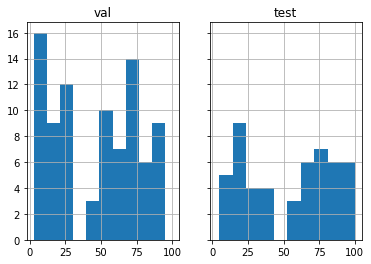

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].set_title("val")
axes[1].set_title("test")
val_meta["pct_cancer"].hist(ax=axes[0])
test_meta["pct_cancer"].hist(ax=axes[1])

<AxesSubplot:title={'center':'test'}>

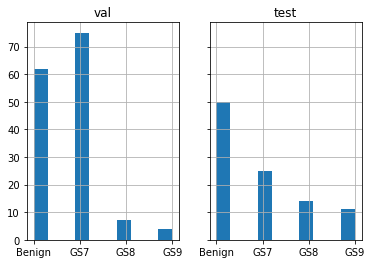

In [79]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].set_title("val")
axes[1].set_title("test")
val_meta["grade"].hist(ax=axes[0])
test_meta["grade"].hist(ax=axes[1])

<AxesSubplot:title={'center':'test_secondary'}>

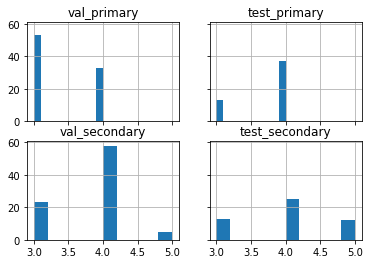

In [80]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0,0].set_title("val_primary")
axes[0,1].set_title("test_primary")
axes[1,0].set_title("val_secondary")
axes[1,1].set_title("test_secondary")
val_meta["primary_grade"].hist(ax=axes[0,0])
test_meta["primary_grade"].hist(ax=axes[0,1])
val_meta["secondary_grade"].hist(ax=axes[1,0])
test_meta["secondary_grade"].hist(ax=axes[1,1])

In [26]:
len(test_meta.query("pct_cancer > 40. and primary_grade==4 and secondary_grade==5"))
len(val_meta.query("pct_cancer > 40. and primary_grade==4 and secondary_grade==4"))

4

In [85]:
splits = get_splits(SplitsConfig('CRCEO'))

val_meta = metadata().query('core_specifier in @splits[1]')
test_meta = metadata().query('core_specifier in @splits[2]')

<AxesSubplot:title={'center':'test'}>

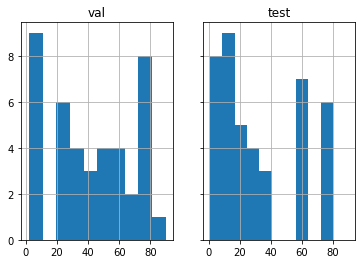

In [86]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].set_title("val")
axes[1].set_title("test")
val_meta["pct_cancer"].hist(ax=axes[0])
test_meta["pct_cancer"].hist(ax=axes[1])

<AxesSubplot:title={'center':'test'}>

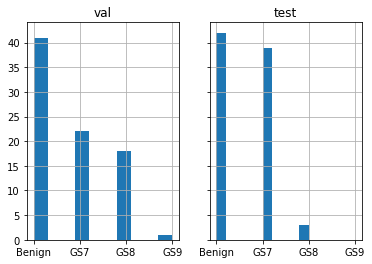

In [88]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].set_title("val")
axes[1].set_title("test")
val_meta["grade"].hist(ax=axes[0])
test_meta["grade"].hist(ax=axes[1])

<AxesSubplot:title={'center':'test_secondary'}>

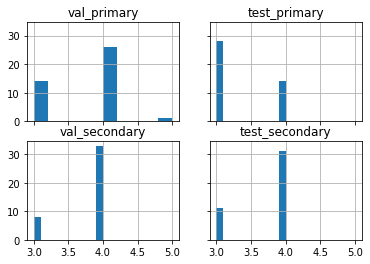

In [89]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0,0].set_title("val_primary")
axes[0,1].set_title("test_primary")
axes[1,0].set_title("val_secondary")
axes[1,1].set_title("test_secondary")
val_meta["primary_grade"].hist(ax=axes[0,0])
test_meta["primary_grade"].hist(ax=axes[0,1])
val_meta["secondary_grade"].hist(ax=axes[1,0])
test_meta["secondary_grade"].hist(ax=axes[1,1])
all_meta = metadata()
all_meta.query("primary_grade == 3")["psa"].hist()
all_meta.query("primary_grade == 3")["psa"].hist()

In [111]:
import scipy.stats as stats
import numpy as np
all_meta = metadata()
all_meta.query("primary_grade == 5 and secondary_grade == 5")

,patient_id,path_on_server,center,loc,grade,age,family_history,psa,pct_cancer,primary_grade,secondary_grade,patient_specifier,core_specifier
6596,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,LAL,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_LAL
6597,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,LAM,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_LAM
6598,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,LBL,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_LBL
6599,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,LBM,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_LBM
6600,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,LML,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_LML
6601,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,RAL,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_RAL
6602,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,RAM,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_RAM
6603,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,RBL,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_RBL
6604,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,RBM,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_RBM
6605,628,/med-i_data/Data/Exact_Ultrasound/data/full_da...,UVA,RML,GS10,76,False,1.2,100.0,5.0,5.0,UVA-0628,UVA-0628_RML


In [107]:
gs3_4 = all_meta.query("primary_grade == 3")
gs4_3 = all_meta.query("primary_grade == 4 and secondary_grade == 3")
Benign = all_meta.query("grade == 'Benign'")
gs4_4 = all_meta.query("primary_grade == 4 and secondary_grade == 4")

<AxesSubplot:>

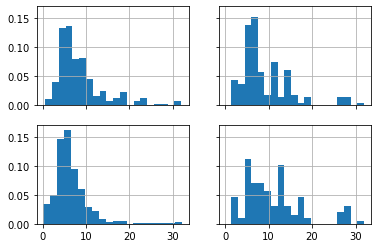

In [108]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
gs3_4["psa"].hist(ax=axes[0,0], density=True, bins=20)
gs4_3["psa"].hist(ax=axes[0,1], density=True, bins=20)
Benign["psa"].hist(ax=axes[1,0], density=True, bins=20)
gs4_4["psa"].hist(ax=axes[1,1], density=True, bins=20)